In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [43]:
nyc_call_data = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")
print(nyc_call_data)
nyc_call_data.head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"


In [24]:
nyc_call_data.info()

# Created and closed date converting into date time format

In [57]:
nyc_call_data['Created Date']=pd.to_datetime(nyc_call_data['Created Date'])
nyc_call_data['Closed Date']=pd.to_datetime(nyc_call_data['Closed Date'])
nyc_call_data['Request_closing_time']=nyc_call_data['Closed Date']-nyc_call_data['Created Date']
nyc_call_data.head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_closing_time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15


# Creating new columns requesting_closing_time and requesting_closing_time_ in_ secs for further analysis

In [58]:
nyc_call_data['Request_closing_time_insecs']=nyc_call_data['Request_closing_time'].dt.seconds
nyc_call_data.head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_closing_time,Request_closing_time_insecs
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,3315.0


In [35]:
nyc_call_data.columns

# Droping Null Value Columns

In [42]:
nyc_call_data=nyc_call_data.drop(labels=['School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Garage Lot Name'],axis=1)
nyc_call_data.head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_closing_time,Request_closing_time_insecs
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,3315.0


In [33]:
nyc_call_data.describe().round()

# Creating Insights

In [18]:
insight1=nyc_call_data[['Complaint Type','Agency']].groupby('Complaint Type').count()
insight1.rename(columns={'Agency':'Entries'},inplace=True)
insight1.sort_values('Entries',inplace=True,ascending=False)
print('Insight-1')
insight1


Insight-1


,Entries
Complaint Type,
Blocked Driveway,77044
Illegal Parking,75361
Noise - Street/Sidewalk,48612
Noise - Commercial,35577
Derelict Vehicle,17718
Noise - Vehicle,17083
Animal Abuse,7778
Traffic,4498
Homeless Encampment,4416


In [52]:
for s in['Complaint Type','Location Type','Agency Name','City','Status']:
    print(s)
    print(nyc_call_data[s].value_counts().head(24))

Complaint Type
Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64
Location Type
Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant   

In [20]:
insight2=nyc_call_data[['Location Type','Agency']].groupby('Location Type').count()
insight2.rename(columns={'Agency':'Entries'},inplace=True)
insight2.sort_values('Entries',inplace=True,ascending=False)
print('Insight-2')
insight2

Insight-2


,Entries
Location Type,
Street/Sidewalk,249299
Store/Commercial,20381
Club/Bar/Restaurant,17360
Residential Building/House,6960
Park/Playground,4773
House of Worship,929
Residential Building,227
Highway,215
Parking Lot,117


In [21]:
insight3=nyc_call_data[['City','Agency']].groupby('City').count()
insight3.rename(columns={'Agency':'Entries'},inplace=True)
insight3.sort_values('Entries',inplace=True,ascending=False)
print('Insight-3')
insight3

Insight-3


,Entries
City,
BROOKLYN,98307
NEW YORK,65994
BRONX,40702
STATEN ISLAND,12343
JAMAICA,7296
ASTORIA,6330
FLUSHING,5971
RIDGEWOOD,5163
CORONA,4295


In [22]:
insight4=nyc_call_data[['Status','Agency']].groupby('Status').count()
insight4.rename(columns={'Agency':'Entries'},inplace=True)
insight4.sort_values('Entries',inplace=True,ascending=False)
print('Insight-4')
insight4

Insight-4


,Entries
Status,
Closed,298471
Open,1439
Assigned,786
Draft,2


In [23]:
insight5=nyc_call_data[['Complaint Type','Location Type','Status','Agency']].groupby(['Complaint Type','Location Type','Status']).count()
insight5.rename(columns={'Agency':'Entries'},inplace=True)
insight5.sort_values('Entries',inplace=True,ascending=False)
print('Insight-5')
pd.set_option('display.max_rows',None)
insight5

Insight-5


,,,Entries
Complaint Type,Location Type,Status,
Blocked Driveway,Street/Sidewalk,Closed,76773
Illegal Parking,Street/Sidewalk,Closed,74497
Noise - Street/Sidewalk,Street/Sidewalk,Closed,48067
Noise - Commercial,Store/Commercial,Closed,18401
Derelict Vehicle,Street/Sidewalk,Closed,17485
Noise - Vehicle,Street/Sidewalk,Closed,17030
Noise - Commercial,Club/Bar/Restaurant,Closed,16841
Animal Abuse,Residential Building/House,Closed,5081
Traffic,Street/Sidewalk,Closed,4276


# Grouping location wise complaints

In [25]:
location_grouping = nyc_call_data['Location Type'].value_counts()
location_grouping

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Terminal                           1
Ferry                              1
Park                               1
Name: Location Type, dtype: int64

In [26]:
location_grouping = nyc_call_data.groupby(['Location Type'])
grouping=location_grouping['Complaint Type'].value_counts()
pd.set_option('display.max_rows',None)
grouping

Location Type               Complaint Type           
Bridge                      Homeless Encampment              2
Club/Bar/Restaurant         Noise - Commercial           16973
                            Drinking                       366
                            Urinating in Public             21
Commercial                  Animal Abuse                    62
Ferry                       Ferry Complaint                  1
Highway                     Traffic                        186
                            Homeless Encampment             15
                            Derelict Vehicle                14
House and Store             Animal Abuse                    93
House of Worship            Noise - House of Worship       929
Park                        Animal in a Park                 1
Park/Playground             Noise - Park                  4041
                            Homeless Encampment            353
                            Animal Abuse                   123
 

In [53]:
grouping.shape

# Data Visualization

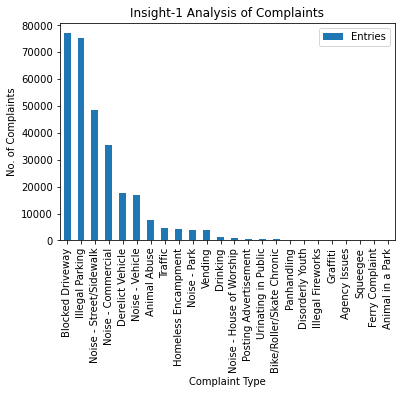

In [28]:
insight1.plot(kind='bar')
plt.xlabel("Complaint Type")
plt.ylabel("No. of Complaints")
plt.title("Insight-1 Analysis of Complaints")
plt.show()

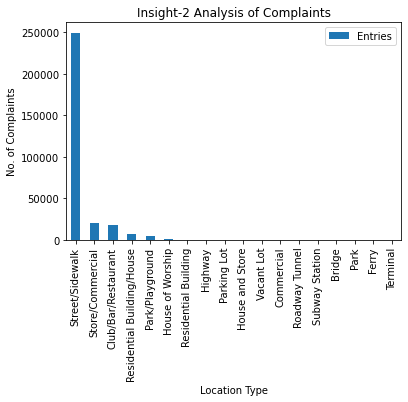

In [61]:
insight2.plot(kind='bar')
plt.xlabel("Location Type")
plt.ylabel("No. of Complaints")
plt.title("Insight-2 Analysis of Complaints")
plt.show()

In [47]:
fig=plt.figure(figsize=(200,4),dpi=1000)
insight3.plot(kind='bar')
plt.xlabel("city")
plt.ylabel("No. of Complaints")
plt.xticks(rotation=30,color='k',size=3,alpha=0.8)
plt.title("Insight-3 Analysis of Complaints")
plt.show()

In [64]:
fig=plt.figure(figsize=(10,4),dpi=1000)
insight4.plot(kind='bar')
plt.xlabel("status")
plt.ylabel("No. of Complaints")
plt.xticks(rotation=30,color='k',size=3,alpha=0.8)
plt.title("Insight-4 Analysis of Complaints")
plt.show()

In [32]:
catagories_complaints=set(nyc_call_data['Complaint Type'].unique())

In [33]:
catagories_complaints

{'Agency Issues',
 'Animal Abuse',
 'Animal in a Park',
 'Bike/Roller/Skate Chronic',
 'Blocked Driveway',
 'Derelict Vehicle',
 'Disorderly Youth',
 'Drinking',
 'Ferry Complaint',
 'Graffiti',
 'Homeless Encampment',
 'Illegal Fireworks',
 'Illegal Parking',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Noise - Park',
 'Noise - Street/Sidewalk',
 'Noise - Vehicle',
 'Panhandling',
 'Posting Advertisement',
 'Squeegee',
 'Traffic',
 'Urinating in Public',
 'Vending'}

# Statistical Analysis

In [59]:
from scipy import stats
from scipy.stats import ttest_ind,pearsonr
stats.ttest_ind
average_response_time={}
for x in catagories_complaints:
     average_response_time[x]= nyc_call_data[nyc_call_data['Complaint Type']==x]['Request_closing_time_insecs'].mean()


In [60]:
for x in catagories_complaints:
    for n in (catagories_complaints)-{x}:
        print('mean for',x,'is :', average_response_time[x])
        print('mean for',n,'is :', average_response_time[n])
        
        stat1= nyc_call_data[nyc_call_data['Complaint Type']==x]['Request_closing_time_insecs'].dropna()
        stat2= nyc_call_data[nyc_call_data['Complaint Type']==n]['Request_closing_time_insecs'].dropna()
        
        test_statistc, p_value = ttest_ind(stat1,stat2)
        print(round(p_value, 3),"p value for similar average for",x,',',n,'\n\n')

mean for Ferry Complaint is : nan
mean for Urinating in Public is : 12326.261824324325
nan p value for similar average for Ferry Complaint , Urinating in Public 


mean for Ferry Complaint is : nan
mean for Animal in a Park is : 3005.0
nan p value for similar average for Ferry Complaint , Animal in a Park 


mean for Ferry Complaint is : nan
mean for Disorderly Youth is : 12508.804195804196
nan p value for similar average for Ferry Complaint , Disorderly Youth 


mean for Ferry Complaint is : nan
mean for Homeless Encampment is : 14757.356884057972
nan p value for similar average for Ferry Complaint , Homeless Encampment 


mean for Ferry Complaint is : nan
mean for Animal Abuse is : 16654.392507723995
nan p value for similar average for Ferry Complaint , Animal Abuse 


mean for Ferry Complaint is : nan
mean for Drinking is : 13021.65725490196
nan p value for similar average for Ferry Complaint , Drinking 


mean for Ferry Complaint is : nan
mean for Illegal Parking is : 14915.0776713

0.0 p value for similar average for Animal Abuse , Drinking 


mean for Animal Abuse is : 16654.392507723995
mean for Illegal Parking is : 14915.077671335803
0.0 p value for similar average for Animal Abuse , Illegal Parking 


mean for Animal Abuse is : 16654.392507723995
mean for Panhandling is : 13475.734426229508
0.0 p value for similar average for Animal Abuse , Panhandling 


mean for Animal Abuse is : 16654.392507723995
mean for Noise - Street/Sidewalk is : 11597.681462684084
0.0 p value for similar average for Animal Abuse , Noise - Street/Sidewalk 


mean for Animal Abuse is : 16654.392507723995
mean for Noise - Park is : 11720.108901044257
0.0 p value for similar average for Animal Abuse , Noise - Park 


mean for Animal Abuse is : 16654.392507723995
mean for Graffiti is : 20392.29203539823
0.01 p value for similar average for Animal Abuse , Graffiti 


mean for Animal Abuse is : 16654.392507723995
mean for Illegal Fireworks is : 9425.815476190477
0.0 p value for similar aver

0.0 p value for similar average for Illegal Parking , Graffiti 


mean for Illegal Parking is : 14915.077671335803
mean for Illegal Fireworks is : 9425.815476190477
0.0 p value for similar average for Illegal Parking , Illegal Fireworks 


mean for Illegal Parking is : 14915.077671335803
mean for Bike/Roller/Skate Chronic is : 12744.169811320755
0.002 p value for similar average for Illegal Parking , Bike/Roller/Skate Chronic 


mean for Illegal Parking is : 14915.077671335803
mean for Noise - Vehicle is : 12154.427816591322
0.0 p value for similar average for Illegal Parking , Noise - Vehicle 


mean for Illegal Parking is : 14915.077671335803
mean for Noise - Commercial is : 10768.414588475614
0.0 p value for similar average for Illegal Parking , Noise - Commercial 


mean for Illegal Parking is : 14915.077671335803
mean for Agency Issues is : 18937.166666666668
0.486 p value for similar average for Illegal Parking , Agency Issues 


mean for Illegal Parking is : 14915.077671335803
m

0.0 p value for similar average for Graffiti , Vending 


mean for Graffiti is : 20392.29203539823
mean for Squeegee is : 14564.25
0.501 p value for similar average for Graffiti , Squeegee 


mean for Graffiti is : 20392.29203539823
mean for Traffic is : 11512.04915480427
0.0 p value for similar average for Graffiti , Traffic 


mean for Graffiti is : 20392.29203539823
mean for Blocked Driveway is : 15784.925608644708
0.001 p value for similar average for Graffiti , Blocked Driveway 


mean for Graffiti is : 20392.29203539823
mean for Posting Advertisement is : 6979.558641975309
0.0 p value for similar average for Graffiti , Posting Advertisement 


mean for Graffiti is : 20392.29203539823
mean for Noise - House of Worship is : 10658.844994617868
0.0 p value for similar average for Graffiti , Noise - House of Worship 


mean for Graffiti is : 20392.29203539823
mean for Derelict Vehicle is : 20119.817887195815
0.877 p value for similar average for Graffiti , Derelict Vehicle 


mean for

0.0 p value for similar average for Vending , Derelict Vehicle 


mean for Squeegee is : 14564.25
mean for Ferry Complaint is : nan
nan p value for similar average for Squeegee , Ferry Complaint 


mean for Squeegee is : 14564.25
mean for Urinating in Public is : 12326.261824324325
0.724 p value for similar average for Squeegee , Urinating in Public 


mean for Squeegee is : 14564.25
mean for Animal in a Park is : 3005.0
nan p value for similar average for Squeegee , Animal in a Park 


mean for Squeegee is : 14564.25
mean for Disorderly Youth is : 12508.804195804196
0.741 p value for similar average for Squeegee , Disorderly Youth 


mean for Squeegee is : 14564.25
mean for Homeless Encampment is : 14757.356884057972
0.978 p value for similar average for Squeegee , Homeless Encampment 


mean for Squeegee is : 14564.25
mean for Animal Abuse is : 16654.392507723995
0.785 p value for similar average for Squeegee , Animal Abuse 


mean for Squeegee is : 14564.25
mean for Drinking is : 13

0.0 p value for similar average for Blocked Driveway , Illegal Parking 


mean for Blocked Driveway is : 15784.925608644708
mean for Panhandling is : 13475.734426229508
0.005 p value for similar average for Blocked Driveway , Panhandling 


mean for Blocked Driveway is : 15784.925608644708
mean for Noise - Street/Sidewalk is : 11597.681462684084
0.0 p value for similar average for Blocked Driveway , Noise - Street/Sidewalk 


mean for Blocked Driveway is : 15784.925608644708
mean for Noise - Park is : 11720.108901044257
0.0 p value for similar average for Blocked Driveway , Noise - Park 


mean for Blocked Driveway is : 15784.925608644708
mean for Graffiti is : 20392.29203539823
0.001 p value for similar average for Blocked Driveway , Graffiti 


mean for Blocked Driveway is : 15784.925608644708
mean for Illegal Fireworks is : 9425.815476190477
0.0 p value for similar average for Blocked Driveway , Illegal Fireworks 


mean for Blocked Driveway is : 15784.925608644708
mean for Bike/Rol

0.0 p value for similar average for Noise - House of Worship , Panhandling 


mean for Noise - House of Worship is : 10658.844994617868
mean for Noise - Street/Sidewalk is : 11597.681462684084
0.018 p value for similar average for Noise - House of Worship , Noise - Street/Sidewalk 


mean for Noise - House of Worship is : 10658.844994617868
mean for Noise - Park is : 11720.108901044257
0.014 p value for similar average for Noise - House of Worship , Noise - Park 


mean for Noise - House of Worship is : 10658.844994617868
mean for Graffiti is : 20392.29203539823
0.0 p value for similar average for Noise - House of Worship , Graffiti 


mean for Noise - House of Worship is : 10658.844994617868
mean for Illegal Fireworks is : 9425.815476190477
0.206 p value for similar average for Noise - House of Worship , Illegal Fireworks 


mean for Noise - House of Worship is : 10658.844994617868
mean for Bike/Roller/Skate Chronic is : 12744.169811320755
0.003 p value for similar average for Noise -

mean for Illegal Fireworks is : 9425.815476190477
0.007 p value for similar average for Disorderly Youth , Illegal Fireworks 


mean for Disorderly Youth is : 12508.804195804196
mean for Bike/Roller/Skate Chronic is : 12744.169811320755
0.8 p value for similar average for Disorderly Youth , Bike/Roller/Skate Chronic 


mean for Disorderly Youth is : 12508.804195804196
mean for Noise - Vehicle is : 12154.427816591322
0.625 p value for similar average for Disorderly Youth , Noise - Vehicle 


mean for Disorderly Youth is : 12508.804195804196
mean for Noise - Commercial is : 10768.414588475614
0.008 p value for similar average for Disorderly Youth , Noise - Commercial 


mean for Disorderly Youth is : 12508.804195804196
mean for Agency Issues is : 18937.166666666668
0.209 p value for similar average for Disorderly Youth , Agency Issues 


mean for Disorderly Youth is : 12508.804195804196
mean for Vending is : 13698.802898550724
0.142 p value for similar average for Disorderly Youth , Vend

0.019 p value for similar average for Noise - Street/Sidewalk , Illegal Fireworks 


mean for Noise - Street/Sidewalk is : 11597.681462684084
mean for Bike/Roller/Skate Chronic is : 12744.169811320755
0.049 p value for similar average for Noise - Street/Sidewalk , Bike/Roller/Skate Chronic 


mean for Noise - Street/Sidewalk is : 11597.681462684084
mean for Noise - Vehicle is : 12154.427816591322
0.0 p value for similar average for Noise - Street/Sidewalk , Noise - Vehicle 


mean for Noise - Street/Sidewalk is : 11597.681462684084
mean for Noise - Commercial is : 10768.414588475614
0.0 p value for similar average for Noise - Street/Sidewalk , Noise - Commercial 


mean for Noise - Street/Sidewalk is : 11597.681462684084
mean for Agency Issues is : 18937.166666666668
0.132 p value for similar average for Noise - Street/Sidewalk , Agency Issues 


mean for Noise - Street/Sidewalk is : 11597.681462684084
mean for Vending is : 13698.802898550724
0.0 p value for similar average for Noise -

0.004 p value for similar average for Illegal Fireworks , Noise - Vehicle 


mean for Illegal Fireworks is : 9425.815476190477
mean for Noise - Commercial is : 10768.414588475614
0.115 p value for similar average for Illegal Fireworks , Noise - Commercial 


mean for Illegal Fireworks is : 9425.815476190477
mean for Agency Issues is : 18937.166666666668
0.034 p value for similar average for Illegal Fireworks , Agency Issues 


mean for Illegal Fireworks is : 9425.815476190477
mean for Vending is : 13698.802898550724
0.0 p value for similar average for Illegal Fireworks , Vending 


mean for Illegal Fireworks is : 9425.815476190477
mean for Squeegee is : 14564.25
0.342 p value for similar average for Illegal Fireworks , Squeegee 


mean for Illegal Fireworks is : 9425.815476190477
mean for Traffic is : 11512.04915480427
0.035 p value for similar average for Illegal Fireworks , Traffic 


mean for Illegal Fireworks is : 9425.815476190477
mean for Blocked Driveway is : 15784.925608644708


0.0 p value for similar average for Noise - Vehicle , Noise - Commercial 


mean for Noise - Vehicle is : 12154.427816591322
mean for Agency Issues is : 18937.166666666668
0.172 p value for similar average for Noise - Vehicle , Agency Issues 


mean for Noise - Vehicle is : 12154.427816591322
mean for Vending is : 13698.802898550724
0.0 p value for similar average for Noise - Vehicle , Vending 


mean for Noise - Vehicle is : 12154.427816591322
mean for Squeegee is : 14564.25
0.692 p value for similar average for Noise - Vehicle , Squeegee 


mean for Noise - Vehicle is : 12154.427816591322
mean for Traffic is : 11512.04915480427
0.002 p value for similar average for Noise - Vehicle , Traffic 


mean for Noise - Vehicle is : 12154.427816591322
mean for Blocked Driveway is : 15784.925608644708
0.0 p value for similar average for Noise - Vehicle , Blocked Driveway 


mean for Noise - Vehicle is : 12154.427816591322
mean for Posting Advertisement is : 6979.558641975309
0.0 p value for sim

0.0 p value for similar average for Derelict Vehicle , Traffic 


mean for Derelict Vehicle is : 20119.817887195815
mean for Blocked Driveway is : 15784.925608644708
0.0 p value for similar average for Derelict Vehicle , Blocked Driveway 


mean for Derelict Vehicle is : 20119.817887195815
mean for Posting Advertisement is : 6979.558641975309
0.0 p value for similar average for Derelict Vehicle , Posting Advertisement 


mean for Derelict Vehicle is : 20119.817887195815
mean for Noise - House of Worship is : 10658.844994617868
0.0 p value for similar average for Derelict Vehicle , Noise - House of Worship 


